In [1]:
# improting improtant libraries 

from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
#uploading all the files related to project

df1=pd.read_csv('train.csv')
df2=pd.read_csv('cpi.csv')
df3=pd.read_csv('geo_attributes.csv')
df4=pd.read_csv('properties.csv')
df5=pd.read_csv('rentindex.csv')
df6=pd.read_csv('vacant.csv')
df7=pd.read_csv('interest.csv')

In [3]:
#explore shape of all related files
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(62949, 3)
(60, 2)
(2861, 8)
(31530, 10)
(20, 2)
(20, 3)
(60, 2)


In [4]:
#merging same shape and data type columns

dff=pd.merge(df2,df7)
# Convert the date column to datetime format and then to the desired format
dff['Data Series']=dff['Data Series'].str.strip()
dff['Data Series']= pd.to_datetime(dff['Data Series'],format='%Y %b'
                          ).dt.strftime('%Y-%m')
dff['Data Series'] = pd.to_datetime(dff['Data Series'])
print(dff.shape)
print(dff.dtypes)
dff.head()

(60, 3)
Data Series     datetime64[ns]
CPI                    float64
InterestRate           float64
dtype: object


Data Series      CPI  InterestRate
0  2022-12-01  111.186          1.48
1  2022-11-01  110.959          1.47
2  2022-10-01  109.893          1.17
3  2022-09-01  110.339          1.03
4  2022-08-01  109.863          0.95

In [5]:
#merging and reset index with predefined values
dfff=pd.merge(df5,df6)
new_index={'2018 1Q': '2018Q1',
       '2018 2Q': '2018Q2',
       '2018 3Q': '2018Q3',
       '2018 4Q': '2018Q4',
       '2019 1Q': '2019Q1',
       '2019 2Q': '2019Q2',
       '2019 3Q': '2019Q3',
       '2019 4Q': '2019Q4',
       '2020 1Q': '2020Q1',
       '2020 2Q': '2020Q2',
       '2020 3Q': '2020Q3',
       '2020 4Q': '2020Q4',
       '2021 1Q': '2021Q1',
       '2021 2Q': '2021Q2',
       '2021 3Q': '2021Q3',
       '2021 4Q': '2021Q4',
       '2022 1Q': '2022Q1',
       '2022 2Q': '2022Q2',
       '2022 3Q': '2022Q3',
       '2022 4Q': '2022Q4'}
dfff['Data Series']=dfff['Data Series'].str.strip().replace(new_index)
print(dfff.shape)
dfff.head()

(20, 4)


Data Series  RentIndex  Available  Vacant
0      2022Q4      148.1      34084     524
1      2022Q3      137.9      34084     514
2      2022Q2      127.0      34084     452
3      2022Q1      119.0      34084     517
4      2021Q4      114.2      34084     576

In [6]:
# Convert the date column to datetime format and set it as the index
dfff['Data Series'] = pd.to_datetime(dfff['Data Series']).dt.to_period('Q')

dfff.set_index('Data Series', inplace=True)
# Resample the dataframe to monthly data
dd = dfff.resample('M').ffill().sort_index(ascending=False)
dd=dd.reset_index()
dd['Data Series'] = dd['Data Series'].astype('datetime64[ns]')
print(dd.shape)
print(dd.dtypes)
dd.head()

(60, 4)
Data Series    datetime64[ns]
RentIndex             float64
Available               int64
Vacant                  int64
dtype: object


C:\Users\Basit Khan\AppData\Local\Temp\ipykernel_13016\3554231511.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfff['Data Series'] = pd.to_datetime(dfff['Data Series']).dt.to_period('Q')


Data Series  RentIndex  Available  Vacant
0  2022-12-01      148.1      34084     524
1  2022-11-01      148.1      34084     524
2  2022-10-01      148.1      34084     524
3  2022-09-01      137.9      34084     514
4  2022-08-01      137.9      34084     514

In [7]:
db=pd.merge(dff,dd,on='Data Series',how='inner')
db=db.rename(columns={'Data Series':'contractDate'})
print(db.shape)
db.head()

(60, 6)


contractDate      CPI  InterestRate  RentIndex  Available  Vacant
0   2022-12-01  111.186          1.48      148.1      34084     524
1   2022-11-01  110.959          1.47      148.1      34084     524
2   2022-10-01  109.893          1.17      148.1      34084     524
3   2022-09-01  110.339          1.03      137.9      34084     514
4   2022-08-01  109.863          0.95      137.9      34084     514

In [8]:
dffff=pd.merge(df1,df4,on='property_key')
print(dffff.shape)
dffff.head()


(62949, 12)


property_key contractDate      price   area floorRange propertyType   
0  p-c1ce31019   2018-03-01  1850000.0  102.0      36-40    Apartment  \
1  p-c1ce31019   2019-06-01  1850000.0  102.0      36-40    Apartment   
2  p-a7fd7deb5   2018-03-01  1030000.0  121.0      01-05  Condominium   
3  p-a7fd7deb5   2018-04-01  1050000.0  121.0      01-05  Condominium   
4  p-a7fd7deb5   2018-05-01  1050000.0  121.0      01-05  Condominium   

   district typeOfArea                             tenure       street   
0         1     Strata  99 yrs lease commencing from 2005  SHENTON WAY  \
1         1     Strata  99 yrs lease commencing from 2005  SHENTON WAY   
2        17     Strata                           Freehold   FLORA ROAD   
3        17     Strata                           Freehold   FLORA ROAD   
4        17     Strata                           Freehold   FLORA ROAD   

         project marketSegment  
0    ONE SHENTON           CCR  
1    ONE SHENTON           CCR  
2  AVILA GARDENS           OCR  
3  AVILA GARDENS           OCR  
4  AVILA GARDENS           OCR

In [9]:
da=pd.merge(dffff,df3,).sort_values(by='contractDate')
da['contractDate']=da['contractDate'].astype('datetime64[ns]')
print(da.shape)
da.head()

(62948, 17)


property_key contractDate      price   area floorRange propertyType   
0     p-c1ce31019   2018-03-01  1850000.0  102.0      36-40    Apartment  \
5128  p-efaeb4d7c   2018-03-01  1320000.0  153.0      01-05    Apartment   
5035  p-896d8c357   2018-03-01  1700000.0  153.0      01-05  Condominium   
5020  p-2d89ee033   2018-03-01   990000.0   70.0      06-10  Condominium   
5018  p-86f48e239   2018-03-01  1780000.0  128.0      11-15  Condominium   

      district typeOfArea                             tenure   
0            1     Strata  99 yrs lease commencing from 2005  \
5128        14     Strata  99 yrs lease commencing from 1997   
5035        19     Strata  99 yrs lease commencing from 2010   
5020        15     Strata                           Freehold   
5018        15     Strata                           Freehold   

                     street          project marketSegment       lat   
0               SHENTON WAY      ONE SHENTON           CCR  1.279295  \
5128      LORONG 39 GEYLANG  SIMS RESIDENCES           RCR  1.316074   
5035          TERRASSE LANE         TERRASSE           OCR  1.367961   
5020  UPPER EAST COAST ROAD   EASTERN LAGOON           OCR  1.313520   
5018  UPPER EAST COAST ROAD   EASTERN LAGOON           OCR  1.313520   

             lng  num_schools_1km  num_supermarkets_500m   
0     103.850553                0                      3  \
5128  103.891093                5                      6   
5035  103.876603                3                      1   
5020  103.933094                2                      0   
5018  103.933094                2                      0   

      num_mrt_stations_500m  
0                        13  
5128                      4  
5035                      0  
5020                      1  
5018                      1

In [10]:
#making final dataset for our project
df=pd.merge(db,da,on='contractDate',how='inner')
print(da.shape)
df.head()

(62948, 17)


contractDate      CPI  InterestRate  RentIndex  Available  Vacant   
0   2022-12-01  111.186          1.48      148.1      34084     524  \
1   2022-12-01  111.186          1.48      148.1      34084     524   
2   2022-12-01  111.186          1.48      148.1      34084     524   
3   2022-12-01  111.186          1.48      148.1      34084     524   
4   2022-12-01  111.186          1.48      148.1      34084     524   

  property_key      price   area floorRange  ... typeOfArea   
0  p-fbe89d145  2650000.0   94.0      11-15  ...     Strata  \
1  p-0b14a42f4  1330000.0  119.0      01-05  ...     Strata   
2  p-59bb1ec08   810000.0   50.0      01-05  ...     Strata   
3  p-5ec231e2c  1230000.0   92.0      01-05  ...     Strata   
4  p-e5918d94e  7100000.0  222.0      11-15  ...     Strata   

                              tenure             street   
0  99 yrs lease commencing from 2016       MARTIN PLACE  \
1                           Freehold         FLORA ROAD   
2                           Freehold       RANGOON ROAD   
3                           Freehold  LORONG 101 CHANGI   
4                           Freehold      KIM SENG ROAD   

                      project marketSegment       lat         lng   
0               MARTIN MODERN           CCR  1.293497  103.838105  \
1  EDELWEISS PARK CONDOMINIUM           OCR  1.356398  103.967734   
2                  RANGOON 88           RCR  1.314382  103.854233   
3                  PARK COURT           RCR  1.315596  103.900194   
4                THE TRILLIUM           CCR  1.293695  103.833117   

   num_schools_1km  num_supermarkets_500m  num_mrt_stations_500m  
0                4                      1                      4  
1                1                      1                      0  
2                3                      6                      4  
3                4                      6                      3  
4                2                      2                      3  

[5 rows x 22 columns]

In [11]:
print(round(df['lat'].mean(),2))
print(round(df['lng'].mean(),2))


1.34
103.86


In [12]:
fig = px.scatter_mapbox(
    df , # Our DataFrame
    lat="lat",
    lon="lng",
    center={"lat": 1.34, "lon": 103.86}, # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price"], # Display price when hovering mouse over house
    )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

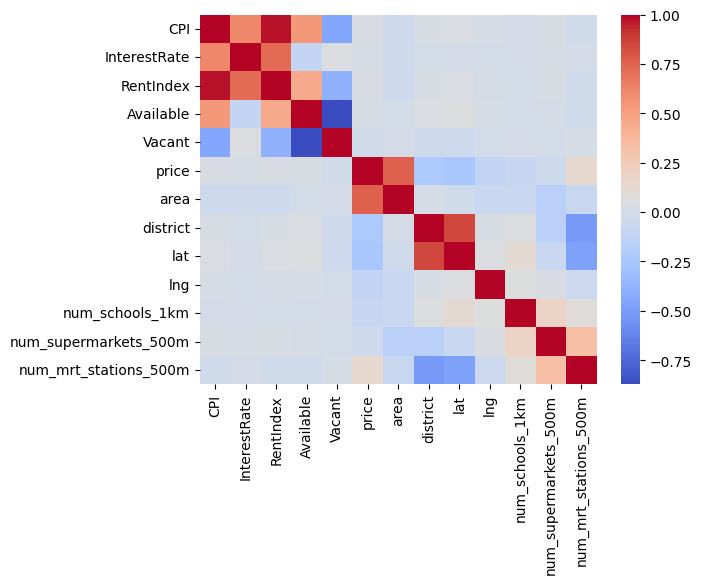

In [13]:
cor=df.select_dtypes('number').corr()
sns.heatmap(cor, cmap='coolwarm')
plt.show()


In [14]:
#droping multi corelated features
df.drop(columns=['RentIndex'],inplace=True)

In [15]:
df.propertyType.unique()

array(['Condominium', 'Apartment', 'Executive Condominium',
       'Semi-detached', 'Terrace', 'Strata Detached', 'Strata Terrace',
       'Detached', 'Strata Semi-detached'], dtype=object)

Text(0.5, 1.0, 'bell curve')

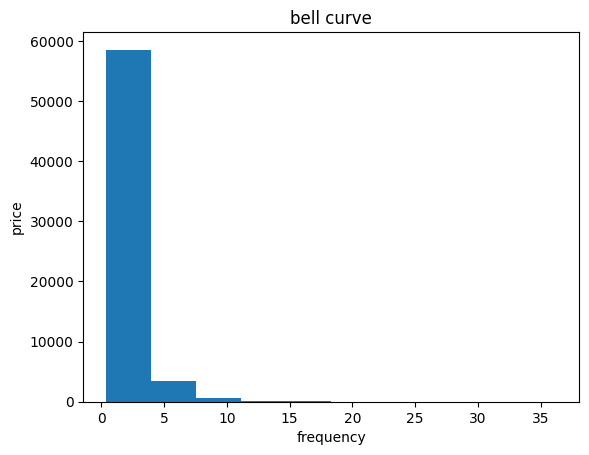

In [16]:
plt.hist(df['price']/1e6)
plt.xlabel('frequency')
plt.ylabel('price')
plt.title('bell curve')

Text(0.5, 1.0, 'outliers')

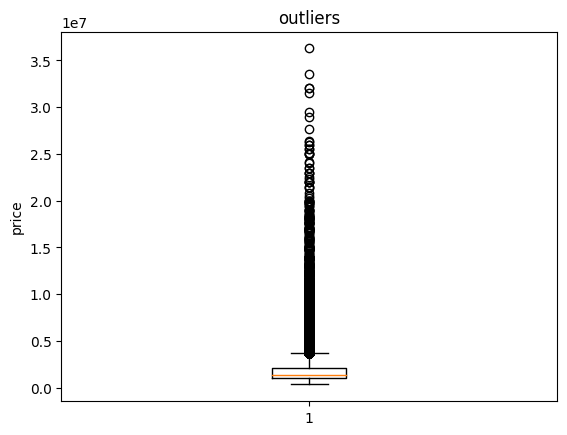

In [17]:
plt.boxplot(df['price']);
plt.ylabel('price')
plt.title('outliers')

In [18]:
low, high=df['price'].quantile([0.0,0.9])
mask=df['price'].between(low,high)
df=df[mask]
len(df)

56653

Text(0.5, 1.0, 'after clearing outliers')

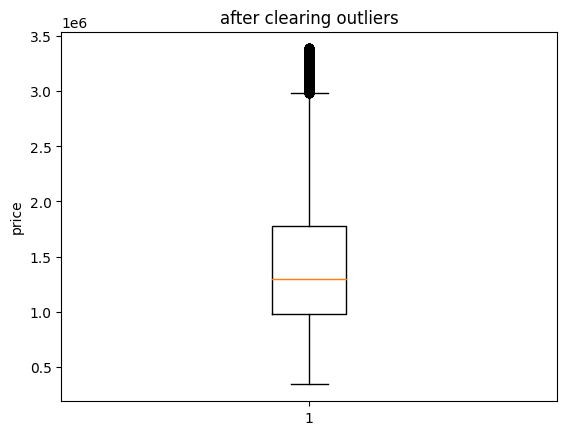

In [19]:
plt.boxplot(df['price']);
plt.ylabel('price')
plt.title('after clearing outliers')

Text(0.5, 1.0, 'bell curve after cleaning outliers')

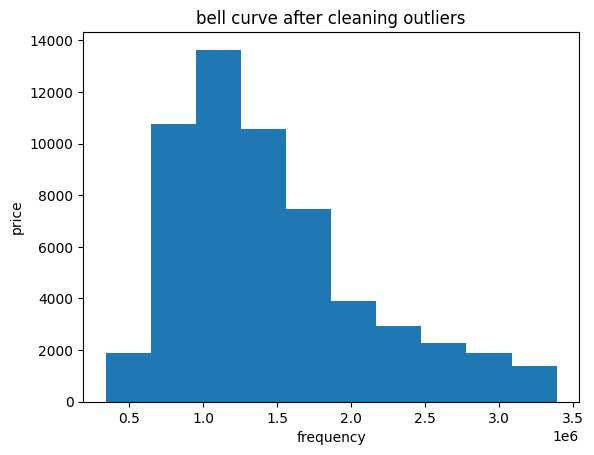

In [20]:
plt.hist(df['price'])
plt.xlabel('frequency')
plt.ylabel('price')
plt.title('bell curve after cleaning outliers')

In [21]:
df.select_dtypes(exclude='number').nunique()

contractDate        58
property_key     26415
floorRange          17
propertyType         9
typeOfArea           2
tenure             116
street            1061
project           2442
marketSegment        3
dtype: int64

In [22]:
df.drop(columns=['tenure','street','project','marketSegment',
                 'property_key','contractDate','typeOfArea'],inplace=True)

In [23]:
df.columns

Index(['CPI', 'InterestRate', 'Available', 'Vacant', 'price', 'area',
       'floorRange', 'propertyType', 'district', 'lat', 'lng',
       'num_schools_1km', 'num_supermarkets_500m', 'num_mrt_stations_500m'],
      dtype='object')

In [24]:
features=['lat','lng','num_schools_1km','num_supermarkets_500m',
          'propertyType','num_mrt_stations_500m','floorRange',
          'CPI','InterestRate','Available','Vacant','district','area'
          ]
target='price'
X=df[features]
y=df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#making model
model=make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),LinearRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['propertyType', 'floorRange'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [26]:
y_pred=model.predict(X_train)
y_pred

array([1559142.85310282, 1231289.0117375 ,  848467.79799031, ...,
       2212233.85210803,  958615.1812422 , 1392808.6867929 ])

In [27]:
model.score(X_train,y_train)

0.6868802905571882

In [28]:
rmse=np.sqrt(mean_squared_error(y_train,y_pred))
rmse

357133.9469750647

In [34]:
interact(y_pred,
        area=IntSlider(
            min=X_train['area'].min(),
            max=X_train['area'].max(),
            value=X_train['area'].mean()),
        lat=FloatSlider(
            min=X_train['lat'].min(),
            max=X_train['lat'].max(),
            step=0.01,
            value=X_train['lat'].mean()),
        lon=FloatSlider(
            min=X_train['lng'].min(),
            max=X_train['lng'].max(),
            step=0.01,
            value=X_train['lng'].mean())
             )
naighbourhood=Dropdown(options=sorted(X_train['district'].unique()))

interactive(children=(IntSlider(value=111, description='area', max=837, min=24), FloatSlider(value=1.343215905…